In [1]:
import pandas as pd
import numpy as np
import re
#import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
data = pd.read_csv(r"C:\Users\user\Downloads\archive3\cr_tweets.csv")

In [5]:
data.head()

,id,createdAt,text,retweetCount,replyCount,likeCount,quoteCount,bookmarkCount
0,1750522838283649232,Thu Jan 25 14:15:42 +0000 2024,"Had an amazing time with @Binance, creating th...",5657,3676,50466,141,186
1,1740707339588825311,Fri Dec 29 12:12:25 +0000 2023,With the best fireworks show in the world - me...,9365,8766,99551,310,364
2,1736824246070890705,Mon Dec 18 19:02:23 +0000 2023,Great memory with my SIXPAD family from the Co...,11088,6263,130247,374,753
3,1736404837649023475,Sun Dec 17 15:15:48 +0000 2023,Grateful to be honored as the most searched at...,21526,7213,194912,1372,1186
4,1732473555923644630,Wed Dec 06 18:54:18 +0000 2023,Funchal is the capital and tourist centre of M...,14517,6903,165795,404,766


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             794 non-null    int64 
 1   createdAt      794 non-null    object
 2   text           794 non-null    object
 3   retweetCount   794 non-null    int64 
 4   replyCount     794 non-null    int64 
 5   likeCount      794 non-null    int64 
 6   quoteCount     794 non-null    int64 
 7   bookmarkCount  794 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 49.8+ KB


In [ ]:
Deleting dupliate TWEETS(if any)

In [9]:
data[data['Tweet'].duplicated(keep=False)].sort_values('Tweet').head(8)

KeyError: 'Tweet'

In [11]:
print(data.columns)


Index(['id', 'createdAt', 'text', 'retweetCount', 'replyCount', 'likeCount',
       'quoteCount', 'bookmarkCount'],
      dtype='object')


In [15]:
data.columns = data.columns.str.strip()  # Enlève les espaces autour des noms


In [17]:
print(data.head())


                    id                       createdAt  \
0  1750522838283649232  Thu Jan 25 14:15:42 +0000 2024   
1  1740707339588825311  Fri Dec 29 12:12:25 +0000 2023   
2  1736824246070890705  Mon Dec 18 19:02:23 +0000 2023   
3  1736404837649023475  Sun Dec 17 15:15:48 +0000 2023   
4  1732473555923644630  Wed Dec 06 18:54:18 +0000 2023   

                                                text  retweetCount  \
0  Had an amazing time with @Binance, creating th...          5657   
1  With the best fireworks show in the world - me...          9365   
2  Great memory with my SIXPAD family from the Co...         11088   
3  Grateful to be honored as the most searched at...         21526   
4  Funchal is the capital and tourist centre of M...         14517   

   replyCount  likeCount  quoteCount  bookmarkCount  
0        3676      50466         141            186  
1        8766      99551         310            364  
2        6263     130247         374            753  
3        7213 

In [63]:
data[data['likecount'].duplicated(keep=False)].sort_values('likecount').head(8)


,id,createdat,text,retweetcount,replycount,likecount,quotecount,bookmarkcount
37,1699902055069241487,Thu Sep 07 21:46:47 +0000 2023,RT @Turki_alalshikh: 🇸🇦🔥🥊\n\n #BattleOfTheBadd...,3164,0,0,0,0
172,1592882164496228352,Wed Nov 16 14:07:56 +0000 2022,RT @binance: The first ever @Cristiano Ronaldo...,2919,0,0,0,0
152,1609620664100753409,Sun Jan 01 18:40:46 +0000 2023,RT @AlNassrFC_EN: Can’t wait to get started! 🤩...,37081,0,0,0,0
151,1610250625719373828,Tue Jan 03 12:24:00 +0000 2023,RT @AlNassrFC_EN: Touchdown Riyadh 🤩\n@Cristia...,25757,0,0,0,0
149,1611397923970891778,Fri Jan 06 16:22:58 +0000 2023,RT @ssc_sports: #Live: #AlNassr vs #AlTai (Ros...,1622,0,0,0,0
148,1611447467203084288,Fri Jan 06 19:39:50 +0000 2023,RT @AlNassrFC_EN: Ronaldo's reaction to @talis...,19805,0,0,0,0
132,1624497052607447040,Sat Feb 11 19:54:13 +0000 2023,RT @nikefootball: @NikeFootball x @Cristiano \...,1125,0,0,0,0
179,1587102291227807744,Mon Oct 31 15:20:47 +0000 2022,RT @nikefootball: Portuguese heritage is now o...,1480,0,0,0,0


In [21]:
print(data.columns.tolist())


['id', 'createdAt', 'text', 'retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'bookmarkCount']


In [23]:
for col in data.columns:
    print(f"'{col}'")  # Affiche les noms de colonnes entourés de guillemets


'id'
'createdAt'
'text'
'retweetCount'
'replyCount'
'likeCount'
'quoteCount'
'bookmarkCount'


In [25]:
data.columns = data.columns.str.strip()  # Supprime les espaces en début/fin
data.columns = data.columns.str.replace(r'\s+', '_', regex=True)  # Remplace les espaces par des underscores


In [29]:
print(data.columns.tolist())


['id', 'createdAt', 'text', 'retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'bookmarkCount']


In [ ]:
NLP

In [37]:
# Importing HTMLParser
import html
from html.parser import HTMLParser
html_parser = HTMLParser()


In [41]:
import html

# Nettoyer les colonnes et afficher les colonnes disponibles
data.columns = data.columns.str.strip().str.lower()
print(data.columns.tolist())

# Appliquer la transformation si la colonne 'tweet' existe
if 'tweet' in data.columns:
    data['clean_tweet'] = data['tweet'].apply(lambda x: html.unescape(x))
    print(data.head(10))
else:
    print("La colonne 'tweet' n'existe pas dans le DataFrame.")


['id', 'createdat', 'text', 'retweetcount', 'replycount', 'likecount', 'quotecount', 'bookmarkcount']
La colonne 'tweet' n'existe pas dans le DataFrame.


In [45]:
print(data.columns.tolist())


['id', 'createdat', 'text', 'retweetcount', 'replycount', 'likecount', 'quotecount', 'bookmarkcount']


In [47]:
print(data.head())


                    id                       createdat  \
0  1750522838283649232  Thu Jan 25 14:15:42 +0000 2024   
1  1740707339588825311  Fri Dec 29 12:12:25 +0000 2023   
2  1736824246070890705  Mon Dec 18 19:02:23 +0000 2023   
3  1736404837649023475  Sun Dec 17 15:15:48 +0000 2023   
4  1732473555923644630  Wed Dec 06 18:54:18 +0000 2023   

                                                text  retweetcount  \
0  Had an amazing time with @Binance, creating th...          5657   
1  With the best fireworks show in the world - me...          9365   
2  Great memory with my SIXPAD family from the Co...         11088   
3  Grateful to be honored as the most searched at...         21526   
4  Funchal is the capital and tourist centre of M...         14517   

   replycount  likecount  quotecount  bookmarkcount  
0        3676      50466         141            186  
1        8766      99551         310            364  
2        6263     130247         374            753  
3        7213 

In [53]:
import pandas as pd
import html

# Nettoyage des noms de colonnes
data.columns = data.columns.str.strip().str.lower()
print("Colonnes disponibles :", data.columns.tolist())

# Vérifiez si la colonne 'tweet' existe
if 'tweet' in data.columns:
    # Traitez la colonne 'tweet'
    data['clean_tweet'] = data['tweet'].apply(lambda x: html.unescape(x) if isinstance(x, str) else x)
    print(data[['tweet', 'clean_tweet']].head(10))
else:
    print("La colonne 'tweet' n'existe pas dans le DataFrame.")



Colonnes disponibles : ['id', 'createdat', 'text', 'retweetcount', 'replycount', 'likecount', 'quotecount', 'bookmarkcount']
La colonne 'tweet' n'existe pas dans le DataFrame.


In [55]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [67]:
import pandas as pd
import re

# Exemple : Supposons que 'tweet' contient les tweets originaux
if 'likecount' in data.columns:
    # Créez ou mettez à jour la colonne 'clean_tweet'
    data['clean_tweet'] = data['likecount'].apply(lambda x: html.unescape(x) if isinstance(x, str) else x)
    
    # Appliquez la transformation regex
    data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r"[^a-zA-Z0-9']",' ', x) if isinstance(x, str) else x)
    
    # Affichez les 10 premières lignes
    print(data.head(10))
else:
    print("La colonne 'tweet' n'existe pas dans le DataFrame.")


                    id                       createdat  \
0  1750522838283649232  Thu Jan 25 14:15:42 +0000 2024   
1  1740707339588825311  Fri Dec 29 12:12:25 +0000 2023   
2  1736824246070890705  Mon Dec 18 19:02:23 +0000 2023   
3  1736404837649023475  Sun Dec 17 15:15:48 +0000 2023   
4  1732473555923644630  Wed Dec 06 18:54:18 +0000 2023   
5  1729477584977600615  Tue Nov 28 12:29:23 +0000 2023   
6  1729250125048840344  Mon Nov 27 21:25:32 +0000 2023   
7  1728182663113273501  Fri Nov 24 22:43:49 +0000 2023   
8  1726373086755184759  Sun Nov 19 22:53:13 +0000 2023   
9  1725281152015937554  Thu Nov 16 22:34:15 +0000 2023   

                                                text  retweetcount  \
0  Had an amazing time with @Binance, creating th...          5657   
1  With the best fireworks show in the world - me...          9365   
2  Great memory with my SIXPAD family from the Co...         11088   
3  Grateful to be honored as the most searched at...         21526   
4  Funchal 

In [75]:
print(data['likecount'].apply(type).value_counts())


likecount
<class 'int'>    794
Name: count, dtype: int64


In [77]:
data['likecount'] = data['likecount'].astype(str)


In [79]:
import re
import numpy as np

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

data['likecount'] = data['likecount'].apply(lambda x: remove_pattern(x, r"[^\w\s]"))


In [83]:
data['likecount'] = np.vectorize(remove_pattern)(data['likecount'].astype(str), r"[^\w\s]")


In [85]:
print(data.head(10))


                    id                       createdat  \
0  1750522838283649232  Thu Jan 25 14:15:42 +0000 2024   
1  1740707339588825311  Fri Dec 29 12:12:25 +0000 2023   
2  1736824246070890705  Mon Dec 18 19:02:23 +0000 2023   
3  1736404837649023475  Sun Dec 17 15:15:48 +0000 2023   
4  1732473555923644630  Wed Dec 06 18:54:18 +0000 2023   
5  1729477584977600615  Tue Nov 28 12:29:23 +0000 2023   
6  1729250125048840344  Mon Nov 27 21:25:32 +0000 2023   
7  1728182663113273501  Fri Nov 24 22:43:49 +0000 2023   
8  1726373086755184759  Sun Nov 19 22:53:13 +0000 2023   
9  1725281152015937554  Thu Nov 16 22:34:15 +0000 2023   

                                                text  retweetcount  \
0  Had an amazing time with @Binance, creating th...          5657   
1  With the best fireworks show in the world - me...          9365   
2  Great memory with my SIXPAD family from the Co...         11088   
3  Grateful to be honored as the most searched at...         21526   
4  Funchal 

In [87]:
data['likecount'] = data['likecount'].apply(
    lambda x: remove_pattern(x, r"[^\w\s]") if isinstance(x, str) else x
)


In [89]:
data['likecount'] = np.vectorize(remove_pattern)(data['likecount'], r"[^\w\s]")
data.head(10)

,id,createdat,text,retweetcount,replycount,likecount,quotecount,bookmarkcount,clean_tweet
0,1750522838283649232,Thu Jan 25 14:15:42 +0000 2024,"Had an amazing time with @Binance, creating th...",5657,3676,50466,141,186,50466
1,1740707339588825311,Fri Dec 29 12:12:25 +0000 2023,With the best fireworks show in the world - me...,9365,8766,99551,310,364,99551
2,1736824246070890705,Mon Dec 18 19:02:23 +0000 2023,Great memory with my SIXPAD family from the Co...,11088,6263,130247,374,753,130247
3,1736404837649023475,Sun Dec 17 15:15:48 +0000 2023,Grateful to be honored as the most searched at...,21526,7213,194912,1372,1186,194912
4,1732473555923644630,Wed Dec 06 18:54:18 +0000 2023,Funchal is the capital and tourist centre of M...,14517,6903,165795,404,766,165795
5,1729477584977600615,Tue Nov 28 12:29:23 +0000 2023,Cooking something up with @binance,15009,10188,226493,776,724,226493
6,1729250125048840344,Mon Nov 27 21:25:32 +0000 2023,Happy that we qualified 1st in our group and t...,34102,11361,453283,800,684,453283
7,1728182663113273501,Fri Nov 24 22:43:49 +0000 2023,Happy weekend everyone! 😀💙💛 https://t.co/uq4H7...,72832,17946,748433,2326,1640,748433
8,1726373086755184759,Sun Nov 19 22:53:13 +0000 2023,"Apuramento histórico, 100% vitorioso! \nParabé...",26577,9274,407454,579,635,407454
9,1725281152015937554,Thu Nov 16 22:34:15 +0000 2023,9 vitórias seguidas!\nSeguimos focados!💪🏼🇵🇹\n#...,28481,10377,421988,692,543,421988


In [91]:
data['likecount'] = data['likecount'].apply(lambda x: x.lower())
data.head(10)

,id,createdat,text,retweetcount,replycount,likecount,quotecount,bookmarkcount,clean_tweet
0,1750522838283649232,Thu Jan 25 14:15:42 +0000 2024,"Had an amazing time with @Binance, creating th...",5657,3676,50466,141,186,50466
1,1740707339588825311,Fri Dec 29 12:12:25 +0000 2023,With the best fireworks show in the world - me...,9365,8766,99551,310,364,99551
2,1736824246070890705,Mon Dec 18 19:02:23 +0000 2023,Great memory with my SIXPAD family from the Co...,11088,6263,130247,374,753,130247
3,1736404837649023475,Sun Dec 17 15:15:48 +0000 2023,Grateful to be honored as the most searched at...,21526,7213,194912,1372,1186,194912
4,1732473555923644630,Wed Dec 06 18:54:18 +0000 2023,Funchal is the capital and tourist centre of M...,14517,6903,165795,404,766,165795
5,1729477584977600615,Tue Nov 28 12:29:23 +0000 2023,Cooking something up with @binance,15009,10188,226493,776,724,226493
6,1729250125048840344,Mon Nov 27 21:25:32 +0000 2023,Happy that we qualified 1st in our group and t...,34102,11361,453283,800,684,453283
7,1728182663113273501,Fri Nov 24 22:43:49 +0000 2023,Happy weekend everyone! 😀💙💛 https://t.co/uq4H7...,72832,17946,748433,2326,1640,748433
8,1726373086755184759,Sun Nov 19 22:53:13 +0000 2023,"Apuramento histórico, 100% vitorioso! \nParabé...",26577,9274,407454,579,635,407454
9,1725281152015937554,Thu Nov 16 22:34:15 +0000 2023,9 vitórias seguidas!\nSeguimos focados!💪🏼🇵🇹\n#...,28481,10377,421988,692,543,421988


In [93]:
data['likecount'][9]

'421988'

In [95]:

# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict


{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [97]:
def lookup_dict(text, dictionary):
    text = text.replace("\n", " ")
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [99]:
data['likecount'] = data['likecount'].apply(lambda x: lookup_dict(x,apostrophe_dict))
data.head(10)

,id,createdat,text,retweetcount,replycount,likecount,quotecount,bookmarkcount,clean_tweet
0,1750522838283649232,Thu Jan 25 14:15:42 +0000 2024,"Had an amazing time with @Binance, creating th...",5657,3676,50466,141,186,50466
1,1740707339588825311,Fri Dec 29 12:12:25 +0000 2023,With the best fireworks show in the world - me...,9365,8766,99551,310,364,99551
2,1736824246070890705,Mon Dec 18 19:02:23 +0000 2023,Great memory with my SIXPAD family from the Co...,11088,6263,130247,374,753,130247
3,1736404837649023475,Sun Dec 17 15:15:48 +0000 2023,Grateful to be honored as the most searched at...,21526,7213,194912,1372,1186,194912
4,1732473555923644630,Wed Dec 06 18:54:18 +0000 2023,Funchal is the capital and tourist centre of M...,14517,6903,165795,404,766,165795
5,1729477584977600615,Tue Nov 28 12:29:23 +0000 2023,Cooking something up with @binance,15009,10188,226493,776,724,226493
6,1729250125048840344,Mon Nov 27 21:25:32 +0000 2023,Happy that we qualified 1st in our group and t...,34102,11361,453283,800,684,453283
7,1728182663113273501,Fri Nov 24 22:43:49 +0000 2023,Happy weekend everyone! 😀💙💛 https://t.co/uq4H7...,72832,17946,748433,2326,1640,748433
8,1726373086755184759,Sun Nov 19 22:53:13 +0000 2023,"Apuramento histórico, 100% vitorioso! \nParabé...",26577,9274,407454,579,635,407454
9,1725281152015937554,Thu Nov 16 22:34:15 +0000 2023,9 vitórias seguidas!\nSeguimos focados!💪🏼🇵🇹\n#...,28481,10377,421988,692,543,421988


In [103]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great",
"nfl": "National Football League",
"ngl": "not gonna lie",
    "nfm": "not for me",
    "usmnt": "United States Men's National Team",
    "epl.": "English Premier League",
     "e.g.": "for example"
}

In [105]:
data['likecount'] = data['likecount'].apply(lambda x: lookup_dict(x,short_word_dict))
data.head(10)

,id,createdat,text,retweetcount,replycount,likecount,quotecount,bookmarkcount,clean_tweet
0,1750522838283649232,Thu Jan 25 14:15:42 +0000 2024,"Had an amazing time with @Binance, creating th...",5657,3676,50466,141,186,50466
1,1740707339588825311,Fri Dec 29 12:12:25 +0000 2023,With the best fireworks show in the world - me...,9365,8766,99551,310,364,99551
2,1736824246070890705,Mon Dec 18 19:02:23 +0000 2023,Great memory with my SIXPAD family from the Co...,11088,6263,130247,374,753,130247
3,1736404837649023475,Sun Dec 17 15:15:48 +0000 2023,Grateful to be honored as the most searched at...,21526,7213,194912,1372,1186,194912
4,1732473555923644630,Wed Dec 06 18:54:18 +0000 2023,Funchal is the capital and tourist centre of M...,14517,6903,165795,404,766,165795
5,1729477584977600615,Tue Nov 28 12:29:23 +0000 2023,Cooking something up with @binance,15009,10188,226493,776,724,226493
6,1729250125048840344,Mon Nov 27 21:25:32 +0000 2023,Happy that we qualified 1st in our group and t...,34102,11361,453283,800,684,453283
7,1728182663113273501,Fri Nov 24 22:43:49 +0000 2023,Happy weekend everyone! 😀💙💛 https://t.co/uq4H7...,72832,17946,748433,2326,1640,748433
8,1726373086755184759,Sun Nov 19 22:53:13 +0000 2023,"Apuramento histórico, 100% vitorioso! \nParabé...",26577,9274,407454,579,635,407454
9,1725281152015937554,Thu Nov 16 22:34:15 +0000 2023,9 vitórias seguidas!\nSeguimos focados!💪🏼🇵🇹\n#...,28481,10377,421988,692,543,421988


In [107]:

emoticon_dict = {
    ":)": " ",
    ":‑)": " ",
    ":-]": " ",
    ":-3": " ",
    ":->": " ",
    "8-)": " ",
    ":-}": " ",
    ":o)": " ",
    ":c)": " ",
    ":^)": " ",
    "=]": " ",
    "=)": " ",
    "<3": " ",
    ":-(": " ",
    ":(": " ",
    ":c": " ",
    ":<": " ",
    ":[": " ",
    ">:(": " ",
    ":{": " ",
    ":-c": " ",
    ":-< ": " ",
    ":-[": " ",
    ":-||": " "
}

In [111]:
data['likecount'] = data['likecount'].apply(lambda x: lookup_dict(x,emoticon_dict))
data.head(60)

,id,createdat,text,retweetcount,replycount,likecount,quotecount,bookmarkcount,clean_tweet
0,1750522838283649232,Thu Jan 25 14:15:42 +0000 2024,"Had an amazing time with @Binance, creating th...",5657,3676,50466,141,186,50466
1,1740707339588825311,Fri Dec 29 12:12:25 +0000 2023,With the best fireworks show in the world - me...,9365,8766,99551,310,364,99551
2,1736824246070890705,Mon Dec 18 19:02:23 +0000 2023,Great memory with my SIXPAD family from the Co...,11088,6263,130247,374,753,130247
3,1736404837649023475,Sun Dec 17 15:15:48 +0000 2023,Grateful to be honored as the most searched at...,21526,7213,194912,1372,1186,194912
4,1732473555923644630,Wed Dec 06 18:54:18 +0000 2023,Funchal is the capital and tourist centre of M...,14517,6903,165795,404,766,165795
5,1729477584977600615,Tue Nov 28 12:29:23 +0000 2023,Cooking something up with @binance,15009,10188,226493,776,724,226493
6,1729250125048840344,Mon Nov 27 21:25:32 +0000 2023,Happy that we qualified 1st in our group and t...,34102,11361,453283,800,684,453283
7,1728182663113273501,Fri Nov 24 22:43:49 +0000 2023,Happy weekend everyone! 😀💙💛 https://t.co/uq4H7...,72832,17946,748433,2326,1640,748433
8,1726373086755184759,Sun Nov 19 22:53:13 +0000 2023,"Apuramento histórico, 100% vitorioso! \nParabé...",26577,9274,407454,579,635,407454
9,1725281152015937554,Thu Nov 16 22:34:15 +0000 2023,9 vitórias seguidas!\nSeguimos focados!💪🏼🇵🇹\n#...,28481,10377,421988,692,543,421988


In [114]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
# Creating token for the clean tweets
data['tweet_token'] = data['likecount'].apply(lambda x: word_tokenize(x))

## Fully formated 
## Fully formated tweets & there tokens
data.head(10)

,id,createdat,text,retweetcount,replycount,likecount,quotecount,bookmarkcount,clean_tweet,tweet_token
0,1750522838283649232,Thu Jan 25 14:15:42 +0000 2024,"Had an amazing time with @Binance, creating th...",5657,3676,50466,141,186,50466,[50466]
1,1740707339588825311,Fri Dec 29 12:12:25 +0000 2023,With the best fireworks show in the world - me...,9365,8766,99551,310,364,99551,[99551]
2,1736824246070890705,Mon Dec 18 19:02:23 +0000 2023,Great memory with my SIXPAD family from the Co...,11088,6263,130247,374,753,130247,[130247]
3,1736404837649023475,Sun Dec 17 15:15:48 +0000 2023,Grateful to be honored as the most searched at...,21526,7213,194912,1372,1186,194912,[194912]
4,1732473555923644630,Wed Dec 06 18:54:18 +0000 2023,Funchal is the capital and tourist centre of M...,14517,6903,165795,404,766,165795,[165795]
5,1729477584977600615,Tue Nov 28 12:29:23 +0000 2023,Cooking something up with @binance,15009,10188,226493,776,724,226493,[226493]
6,1729250125048840344,Mon Nov 27 21:25:32 +0000 2023,Happy that we qualified 1st in our group and t...,34102,11361,453283,800,684,453283,[453283]
7,1728182663113273501,Fri Nov 24 22:43:49 +0000 2023,Happy weekend everyone! 😀💙💛 https://t.co/uq4H7...,72832,17946,748433,2326,1640,748433,[748433]
8,1726373086755184759,Sun Nov 19 22:53:13 +0000 2023,"Apuramento histórico, 100% vitorioso! \nParabé...",26577,9274,407454,579,635,407454,[407454]
9,1725281152015937554,Thu Nov 16 22:34:15 +0000 2023,9 vitórias seguidas!\nSeguimos focados!💪🏼🇵🇹\n#...,28481,10377,421988,692,543,421988,[421988]


In [122]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:
data['tweet_token_filtered'] = data['likecount'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
data[['likecount', 'tweet_token_filtered']].head(10)

,likecount,tweet_token_filtered
0,50466,"[5, 0, 4, 6, 6]"
1,99551,"[9, 9, 5, 5, 1]"
2,130247,"[1, 3, 0, 2, 4, 7]"
3,194912,"[1, 9, 4, 9, 1, 2]"
4,165795,"[1, 6, 5, 7, 9, 5]"
5,226493,"[2, 2, 6, 4, 9, 3]"
6,453283,"[4, 5, 3, 2, 8, 3]"
7,748433,"[7, 4, 8, 4, 3, 3]"
8,407454,"[4, 0, 7, 4, 5, 4]"
9,421988,"[4, 2, 1, 9, 8, 8]"


In [126]:
data['tweet_token_filtered'][66]

['2', '9', '8', '3', '1', '1']

In [128]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [130]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
data['text'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
data['text'].head(10)

0      5 0 4 6 6
1      9 9 5 5 1
2    1 3 0 2 4 7
3    1 9 4 9 1 2
4    1 6 5 7 9 5
5    2 2 6 4 9 3
6    4 5 3 2 8 3
7    7 4 8 4 3 3
8    4 0 7 4 5 4
9    4 2 1 9 8 8
Name: text, dtype: object

In [132]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [134]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [136]:
data['text'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
data['text'].head(10)

0      5 0 4 6 6
1      9 9 5 5 1
2    1 3 0 2 4 7
3    1 9 4 9 1 2
4    1 6 5 7 9 5
5    2 2 6 4 9 3
6    4 5 3 2 8 3
7    7 4 8 4 3 3
8    4 0 7 4 5 4
9    4 2 1 9 8 8
Name: text, dtype: object

In [138]:
df_copy = data
def count_elements(vector): 
    return pd.Series([len(vector)])

In [140]:
df_copy['num_elementos'] = df_copy['tweet_token'].apply(count_elements)

df_copy

,id,createdat,text,retweetcount,replycount,likecount,quotecount,bookmarkcount,clean_tweet,tweet_token,tweet_token_filtered,num_elementos
0,1750522838283649232,Thu Jan 25 14:15:42 +0000 2024,5 0 4 6 6,5657,3676,50466,141,186,50466,[50466],"[5, 0, 4, 6, 6]",1
1,1740707339588825311,Fri Dec 29 12:12:25 +0000 2023,9 9 5 5 1,9365,8766,99551,310,364,99551,[99551],"[9, 9, 5, 5, 1]",1
2,1736824246070890705,Mon Dec 18 19:02:23 +0000 2023,1 3 0 2 4 7,11088,6263,130247,374,753,130247,[130247],"[1, 3, 0, 2, 4, 7]",1
3,1736404837649023475,Sun Dec 17 15:15:48 +0000 2023,1 9 4 9 1 2,21526,7213,194912,1372,1186,194912,[194912],"[1, 9, 4, 9, 1, 2]",1
4,1732473555923644630,Wed Dec 06 18:54:18 +0000 2023,1 6 5 7 9 5,14517,6903,165795,404,766,165795,[165795],"[1, 6, 5, 7, 9, 5]",1
...,...,...,...,...,...,...,...,...,...,...,...,...
789,1028009676674355201,Fri Aug 10 20:06:21 +0000 2018,8 0 0 7 2,5814,1330,80072,375,29,80072,[80072],"[8, 0, 0, 7, 2]",1
790,1027878299073216512,Fri Aug 10 11:24:18 +0000 2018,3 2 0 6 9 8,42310,3867,320698,5320,144,320698,[320698],"[3, 2, 0, 6, 9, 8]",1
791,1026883168350027777,Tue Aug 07 17:30:00 +0000 2018,8 3 8 5 9,5662,1777,83859,260,24,83859,[83859],"[8, 3, 8, 5, 9]",1
792,1026048865634590720,Sun Aug 05 10:14:47 +0000 2018,2 0 2 0 4 2,15308,2439,202042,557,50,202042,[202042],"[2, 0, 2, 0, 4, 2]",1


In [142]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [156]:
count_vectorizer = CountVectorizer()
dtm = count_vectorizer.fit_transform(data['likecount'])

In [158]:
total_words = dtm.sum()
total_words

777

In [164]:
count_vectorizer = CountVectorizer()
dtm = count_vectorizer.fit_transform(data['likecount'])
total_words = dtm.sum()
total_words

777

In [166]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(data['likecount'])
total_words = tfidf.sum()
total_words

777.0

In [170]:
num_rows = data.likecount.shape[0]


subset_size = int(num_rows * 0.1)

np.random.seed(42)

random_indices = np.random.choice(num_rows, subset_size, replace=False)

subset_df = data.likecount.iloc[random_indices]

subset_df 

690    183599
775    120878
63     107906
531    256774
66     298311
        ...  
31     560679
199    530065
578    214769
568    147605
688    214361
Name: likecount, Length: 79, dtype: object

In [172]:
from sklearn.cluster import KMeans
X = tfidf_vectorizer.fit_transform(subset_df)
max_clusters = 20 
scores = [] 

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)

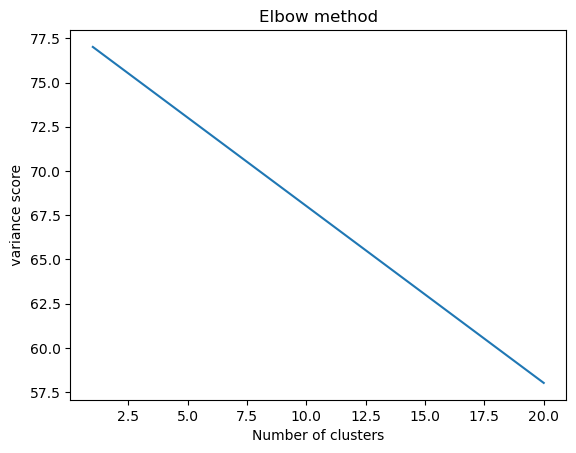

In [174]:
# Elbow method 
import matplotlib.pyplot as plt
plt.plot(range(1, max_clusters + 1), scores)
plt.xlabel('Number of clusters')
plt.ylabel(' variance score ')
plt.title('Elbow method')
plt.show()

In [176]:
kmeansmodel = KMeans(n_clusters=7,init='k-means++', random_state = 42)
y_kmeans= kmeansmodel.fit_predict(X)

In [178]:
kmeansmodel

KMeans(n_clusters=7, random_state=42)

In [188]:
freqX = pd.Series(' '.join(data['likecount']).split()).value_counts()[:25]

print('FREQ X: \n',freqX)

FREQ X: 
 0         17
329813     1
229116     1
256774     1
193272     1
114294     1
245776     1
262825     1
153486     1
215513     1
149537     1
104383     1
50466      1
192668     1
226435     1
234872     1
255246     1
111941     1
102305     1
131675     1
108796     1
39138      1
140630     1
109928     1
101593     1
Name: count, dtype: int64


In [190]:
rareX = pd.Series(' '.join(data['likecount']).split()).value_counts()[-100:]
print('RARE X: \n',rareX)

RARE X: 
 144343    1
177472    1
388167    1
127402    1
373008    1
         ..
263533    1
187967    1
46456     1
62630     1
236692    1
Name: count, Length: 100, dtype: int64


In [194]:
vectorizer = CountVectorizer(stop_words='english', binary=True)  # Binary to treat as set-like presence
binary_features = vectorizer.fit_transform(data.likecount)

In [196]:
dense_matrix = binary_features.toarray()

# Compute pairwise Jaccard distances
from sklearn.metrics import pairwise_distances
jaccard_distance_matrix = pairwise_distances(dense_matrix, metric='jaccard')

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [198]:
kmeans=KMeans(n_clusters=7, random_state=42)
kmeans.fit(jaccard_distance_matrix)

KMeans(n_clusters=7, random_state=42)

In [202]:
tweets = data['likecount'].tolist()
tweets

['50466',
 '99551',
 '130247',
 '194912',
 '165795',
 '226493',
 '453283',
 '748433',
 '407454',
 '421988',
 '388857',
 '472028',
 '409280',
 '526148',
 '423853',
 '501370',
 '546764',
 '522024',
 '473632',
 '508630',
 '371325',
 '302692',
 '403207',
 '509610',
 '498785',
 '151388',
 '706774',
 '628624',
 '376118',
 '372655',
 '173084',
 '560679',
 '160262',
 '544634',
 '419445',
 '494671',
 '457095',
 '0',
 '817975',
 '497146',
 '191582',
 '405929',
 '57842',
 '0',
 '0',
 '124596',
 '422136',
 '202389',
 '423929',
 '378819',
 '153729',
 '750358',
 '990235',
 '125519',
 '459038',
 '151944',
 '97256',
 '454989',
 '489818',
 '320821',
 '443517',
 '302200',
 '374922',
 '107906',
 '100091',
 '9605',
 '298311',
 '0',
 '100240',
 '359923',
 '102612',
 '7688',
 '134348',
 '88547',
 '100501',
 '66739',
 '100984',
 '79545',
 '308899',
 '122456',
 '153187',
 '0',
 '111096',
 '351158',
 '89853',
 '81195',
 '235690',
 '171055',
 '308126',
 '40847',
 '582738',
 '194070',
 '0',
 '0',
 '234276',
 '52

In [204]:
# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_
# Asignar etiquetas de cluster a cada tweet
cluster_labels = kmeans.labels_

cluster_labels

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 2, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4,

In [206]:

results = pd.DataFrame({'tweet': tweets,'cluster': cluster_labels})
for cluster in range(7):
    print(f"Cluster {cluster}:")
    cluster_users = results[results['cluster'] == cluster]
    print(cluster_users)

Cluster 0:
      tweet  cluster
297  163812        0
Cluster 1:
      tweet  cluster
748  153618        1
Cluster 2:
    tweet  cluster
37      0        2
43      0        2
44      0        2
67      0        2
81      0        2
92      0        2
93      0        2
121     0        2
128     0        2
132     0        2
148     0        2
149     0        2
151     0        2
152     0        2
172     0        2
179     0        2
209     0        2
Cluster 3:
      tweet  cluster
689  112323        3
Cluster 4:
      tweet  cluster
0     50466        4
1     99551        4
2    130247        4
3    194912        4
4    165795        4
..      ...      ...
789   80072        4
790  320698        4
791   83859        4
792  202042        4
793  236692        4

[772 rows x 2 columns]
Cluster 5:
      tweet  cluster
180  258587        5
Cluster 6:
      tweet  cluster
252  380786        6


<Axes: xlabel='cluster', ylabel='count'>

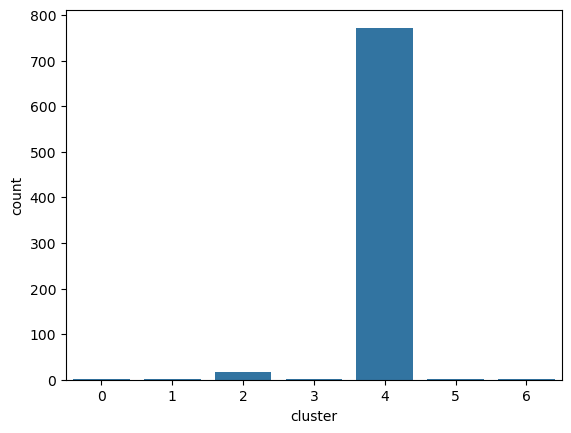

In [208]:
import seaborn as sns 
sns.countplot(data =results, x = 'cluster')

In [210]:
from sklearn.metrics import euclidean_distances

vectorized_tweets =jaccard_distance_matrix
# Choose representative tweets based on proximity to centroid
representative_tweets = []

for cluster in range(7):  # Assuming 7 clusters
    print(f"Cluster {cluster}:")
    
    # Get the indices of the tweets in the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    
    # Get the vectors of the tweets in this cluster
    cluster_vectors = vectorized_tweets[cluster_indices]
    
    # Get the centroid of the current cluster
    centroid = centroids[cluster]
    
    # Calculate distances from each tweet to the centroid
    distances = euclidean_distances(cluster_vectors, centroid.reshape(1, -1))
    
    # Find the tweet with the minimum distance to the centroid
    closest_tweet_index = cluster_indices[np.argmin(distances)]
    
    # Get the tweet text from the closest tweet
    representative_tweet = tweets[closest_tweet_index]
    
    print(f"Representative Tweet: {representative_tweet}")
    representative_tweets.append(representative_tweet)

Cluster 0:
Representative Tweet: 163812
Cluster 1:
Representative Tweet: 153618
Cluster 2:
Representative Tweet: 0
Cluster 3:
Representative Tweet: 112323
Cluster 4:
Representative Tweet: 50466
Cluster 5:
Representative Tweet: 258587
Cluster 6:
Representative Tweet: 380786


In [223]:

pip install scikit-fuzzy



   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   --------------------- ---------------- 524.3/920.8 kB 762.0 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/920.8 kB 762.0 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/920.8 kB 762.0 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/920.8 kB 762.0 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/920.8 kB 762.0 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 353.1 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 353.1 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 353.1 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 353.1 kB/s eta

In [225]:
import skfuzzy as fuzz


In [243]:
pip install fuzzy-c-means


  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
Note: you may need to restart the kernel to use updated packages.


In [247]:
from fuzzy_c_means import FCM

# Exemple de données
X = [[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]]

# Création du modèle FCM
fcm = FCM(n_clusters=2)

# Entraînement du modèle
fcm.fit(X)

# Prédictions des clusters
labels = fcm.predict(X)

print(labels)
from fuzzy_c_means import FCM

# Exemple de données
X = [[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]]

# Création du modèle FCM
fcm = FCM(n_clusters=2)

# Entraînement du modèle
fcm.fit(X)

# Prédictions des clusters
labels = fcm.predict(X)

print(labels)


ModuleNotFoundError: No module named 'fuzzy_c_means'

In [249]:
pip install fuzzy-c-means


Note: you may need to restart the kernel to use updated packages.


In [253]:
import skfuzzy as fuzz
import numpy as np

# Exemple de données (5 points dans un espace bidimensionnel)
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

# Transposez les données pour que chaque ligne soit un point dans l'espace
X = X.T

# Nombre de clusters
n_clusters = 2

# Appliquez Fuzzy C-Means avec m=2 (indique la "fuzziness" du clustering)
centroids, u, _, _, _, _, _ = fuzz.cluster.cmeans(X, c=n_clusters, m=2, error=0.005, maxiter=1000)

# Calcul des labels de cluster
labels = np.argmax(u, axis=0)

print("Centroids:", centroids)
print("Labels de cluster:", labels)



Centroids: [[1.01293795 1.99934854]
 [9.98706209 2.00065975]]
Labels de cluster: [0 0 0 1 1 1]


In [255]:
from fcmeans import FCM 

In [259]:
vectorizer = TfidfVectorizer()  # Binary to treat as set-like presence
binary_features = vectorizer.fit_transform(data.likecount)
dense_matrix = binary_features.toarray()

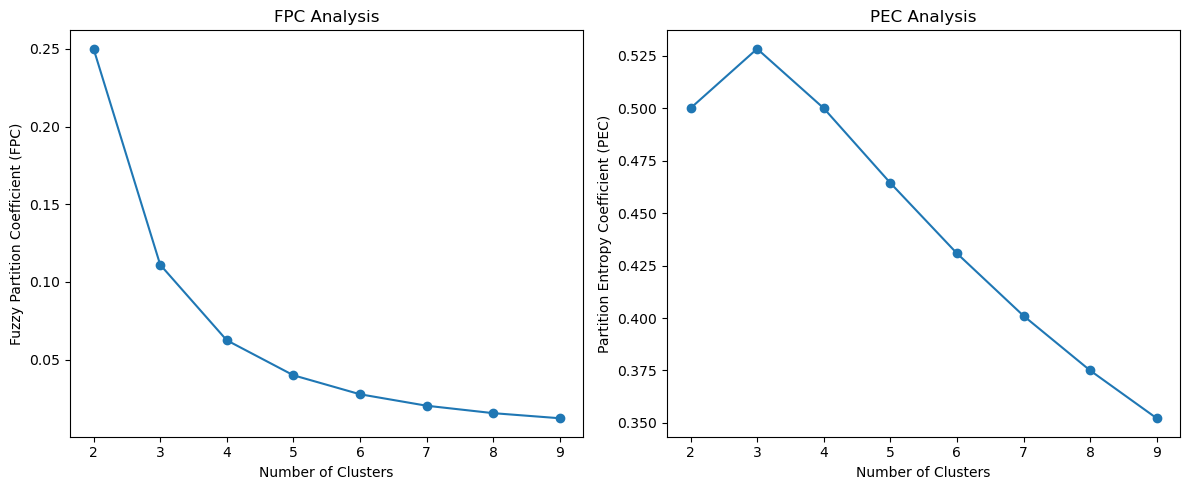

In [261]:
FPC = []
PEC = []

# Iterate over a range of clusters
for n_clusters in range(2, 10):
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(dense_matrix)  # Replace `data` with your dataset
    
    FPC.append(fcm.partition_coefficient)  # Use FPC
    PEC.append(fcm.partition_entropy_coefficient)  # Use PEC

# Plot the FPC and PEC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), FPC, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.title('FPC Analysis')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), PEC, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Partition Entropy Coefficient (PEC)')
plt.title('PEC Analysis')

plt.tight_layout()
plt.show()

In [269]:
# Step 2: Apply Fuzzy C-Means clustering
fcm = FCM(n_clusters=4, m=2)  # m=2 is a common choice for the fuzziness factor
fcm.fit(dense_matrix)

# Get the degree of membership (membership matrix)
membership = fcm.u

# Step 3: Assign each tweet to a cluster
cluster_labels = np.argmax(membership, axis=1)

# Step 4: Choose representative tweets based on maximum membership
representative_tweets = []

for cluster in range(4):  # Assuming 4 clusters, adjust if necessary
    # Get the indices of tweets in the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    
    # Get the membership values for the cluster
    cluster_membership = membership[cluster_indices, cluster]
    
    # Find the tweet with the highest membership to the cluster
    closest_tweet_index = cluster_indices[np.argmax(cluster_membership)]
    
    # Get the tweet text from the closest tweet
    representative_tweet = tweets[closest_tweet_index]
    
    print(f"Cluster {cluster}:")
    print(f"Representative Tweet: {representative_tweet}")
    representative_tweets.append(representative_tweet)

ValueError: attempt to get argmax of an empty sequence

In [271]:
cluster_membership = membership[cluster_indices, cluster]


In [273]:
print(f"cluster_indices: {cluster_indices}")
print(f"membership shape: {membership.shape}")
print(f"cluster_membership: {cluster_membership}")


cluster_indices: []
membership shape: (794, 4)
cluster_membership: []


In [275]:
if cluster_membership.size > 0:
    closest_tweet_index = cluster_indices[np.argmax(cluster_membership)]
else:
    print("Le cluster est vide, aucun tweet le représentant.")
    closest_tweet_index = None  # ou tout autre comportement par défaut


Le cluster est vide, aucun tweet le représentant.


In [277]:
import numpy as np

# Exemple d'indices et de membres du cluster (vous devez ajuster en fonction de vos données)
# cluster_indices : indices des tweets dans le cluster
# membership : matrice d'appartenance avec des scores d'appartenance aux clusters

# Supposons que `membership` est une matrice où chaque ligne représente un tweet et chaque colonne un cluster
# Par exemple :
# membership = np.array([[0.2, 0.8], [0.9, 0.1], [0.4, 0.6]])

# Exemple de cluster spécifique
cluster = 1  # Le numéro du cluster pour lequel vous voulez trouver le tweet le plus proche

# Extraction des scores d'appartenance pour un cluster donné
cluster_membership = membership[:, cluster]

# Vérification si le cluster est vide (tous les scores d'appartenance sont nuls ou inexistants)
if np.any(cluster_membership > 0):  # Vérifie s'il y a des membres dans le cluster
    # Trouver l'indice du tweet ayant le plus fort score d'appartenance au cluster
    closest_tweet_index = np.argmax(cluster_membership)
    
    # Récupérer le texte du tweet correspondant (remplacez `tweets` par votre liste de tweets)
    representative_tweet = tweets[closest_tweet_index]  # Assurez-vous que `tweets` contient vos tweets
    print(f"Tweet représentatif du cluster {cluster}: {representative_tweet}")
else:
    # Si le cluster est vide, vous pouvez afficher un message ou gérer cela autrement
    print(f"Le cluster {cluster} est vide, aucun tweet représentatif.")
    closest_tweet_index = None  # ou vous pouvez attribuer une valeur par défaut ou ignorer
    representative_tweet = None  # Aucun tweet à afficher


Tweet représentatif du cluster 1: 564817
